[Reference](https://medium.com/@manilwagle/using-natural-language-processing-for-preventive-maintenance-70005fce1eaa)

In [1]:
import pandas as pd
import warnings
data = pd.read_csv('https://raw.githubusercontent.com/manilwagle/medium/main/Call%20centre%20logs_sample.csv')
data.head()

,Comments
0,Needs a large recycling bin on wheels
1,Please lower the temp in the 5th floor northe...
2,hand sanitizer dispensers in the main lobby n...
3,There is a light out in the ladies washroom
4,It is too cold.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [3]:
data.describe()

,Comments
count,6
unique,6
top,Needs a large recycling bin on wheels
freq,1


In [5]:
!pip install pycaret

     |████████████████████████████████| 319 kB 4.5 MB/s 
     |████████████████████████████████| 167 kB 12.4 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 116 kB 41.2 MB/s 
     |████████████████████████████████| 2.0 MB 33.1 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 1.7 MB 34.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 61.4 MB/s 
     |████████████████████████████████| 16.5 MB 40.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.4 MB/s 
     |████████████████████████████████| 6.8 MB 36.7 MB/s 
     |████████████████████████████████| 102 kB 9.8 MB/s 
     |████████████████████████████████| 3.1 MB 32.7 MB/s 
     |████████████████████████████████| 303 kB 37.8 MB/s 
     |██████████████████

In [6]:
from pycaret.nlp import *
call_logs = setup(data = data, target = 'Comments', session_id = 123,
                                    custom_stopwords = ['see', 'front', 'thank', 'client', 'man', 'woman', 'category', 'need', 
                                       'desk', 'properly','come', 'floor', 'issue', 'assisit', 'would', 'office'])

Description,Value
session_id,123
Documents,6
Vocab Size,19
Custom Stopwords,True


In [9]:
comments = create_model('lda', num_topics = 5, multi_core = True) 

In [10]:
warnings.filterwarnings('ignore')
plot_model(comments, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.108924  0.050195       1        1  29.644224
2      0.060778 -0.107801       2        1  26.582487
3     -0.111787 -0.048359       3        1  19.923803
4     -0.056029  0.107571       4        1  19.923803
0     -0.001886 -0.001607       5        1   3.925684, topic_info=         Term      Freq     Total Category  logprob  loglift
3       wheel  0.000000  0.000000  Default  19.0000  19.0000
11      lobby  0.000000  0.000000  Default  18.0000  18.0000
1       large  0.000000  0.000000  Default  17.0000  17.0000
2   recycling  0.000000  0.000000  Default  16.0000  16.0000
10  dispenser  0.000000  0.000000  Default  15.0000  15.0000
..        ...       ...       ...      ...      ...      ...
6    northern  0.041321  1.080002   Topic5  -2.9445  -0.0257
9    training  0.041321  1.080002   Topic5  -2.9445  -0.0257
8        temp  0.041321  1.080002   Topic5  -2.9445  -0.0257
5       lower  0.041321  1.080002   Topic5  -2.9445  -0.0257
4       light  0.041334  1.622776   Topic5  -2.9442  -0.4326

[114 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
15        2  0.982504       adjust
0         4  1.014174          bin
16        2  0.982504         cold
10        3  1.014174    dispenser
14        2  0.982517         lady
1         4  1.014175        large
4         1  0.616228        light
4         2  0.616228        light
11        3  1.014173        lobby
5         1  0.925924        lower
12        3  1.014173         main
6         1  0.925925     northern
2         4  1.014175    recycling
13        3  1.014174       refill
7         1  0.925924         room
17        2  0.982503         send
8         1  0.925924         temp
18        2  0.982505  temperature
9         1  0.925924     training
3         4  1.014175        wheel, R=19, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

In [11]:
# Assign model
call_log_results = assign_model(comments)
call_log_results.head()

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,large recycling bin wheel,0.040016,0.040006,0.040006,0.040007,0.839965,Topic 4,0.84
1,lower temp northern light training room,0.028586,0.885547,0.028711,0.028578,0.028578,Topic 1,0.89
2,dispenser main lobby refill,0.040016,0.040006,0.040006,0.839965,0.040007,Topic 3,0.84
3,light lady,0.066704,0.067755,0.732175,0.066683,0.066684,Topic 2,0.73
4,,0.200000,0.200000,0.200000,0.200000,0.200000,Topic 0,0.20


In [12]:
dominant_topics = call_log_results
with pd.option_context('display.max_colwidth', None):
    display(dominant_topics)

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,large recycling bin wheel,0.040016,0.040006,0.040006,0.040007,0.839965,Topic 4,0.84
1,lower temp northern light training room,0.028586,0.885547,0.028711,0.028578,0.028578,Topic 1,0.89
2,dispenser main lobby refill,0.040016,0.040006,0.040006,0.839965,0.040007,Topic 3,0.84
3,light lady,0.066704,0.067755,0.732175,0.066683,0.066684,Topic 2,0.73
4,,0.200000,0.200000,0.200000,0.200000,0.200000,Topic 0,0.20
5,cold send adjust temperature,0.040021,0.040007,0.839953,0.040009,0.040009,Topic 2,0.84


In [13]:
dominant_topics = call_log_results
with pd.option_context('display.max_colwidth', None):
    display(dominant_topics)

,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,large recycling bin wheel,0.040016,0.040006,0.040006,0.040007,0.839965,Topic 4,0.84
1,lower temp northern light training room,0.028586,0.885547,0.028711,0.028578,0.028578,Topic 1,0.89
2,dispenser main lobby refill,0.040016,0.040006,0.040006,0.839965,0.040007,Topic 3,0.84
3,light lady,0.066704,0.067755,0.732175,0.066683,0.066684,Topic 2,0.73
4,,0.200000,0.200000,0.200000,0.200000,0.200000,Topic 0,0.20
5,cold send adjust temperature,0.040021,0.040007,0.839953,0.040009,0.040009,Topic 2,0.84


In [14]:
plot_model(comments, plot = 'topic_distribution')

In [15]:
plot_model(comments, plot='wordcloud')

SystemExit: ignored

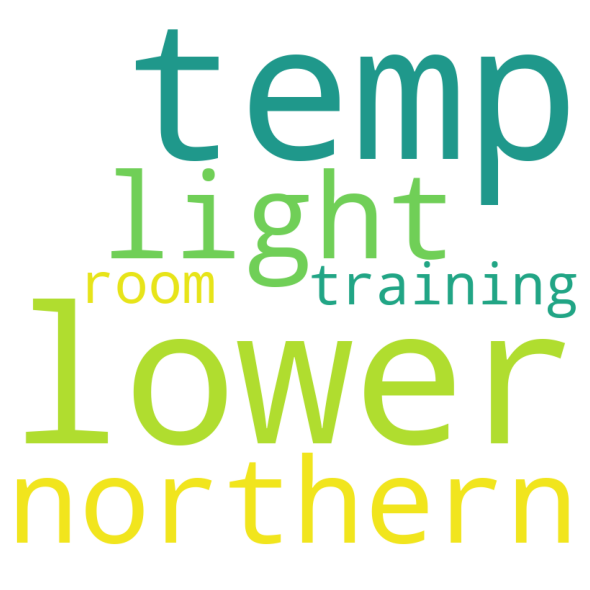

In [16]:
plot_model(comments, plot='wordcloud', topic_num = 'Topic 1')

In [17]:
plot_model(comments, plot='frequency')

SystemExit: ignored

In [18]:
plot_model(comments, plot='frequency', topic_num = 'Topic 2')

In [19]:
plot_model(comments, plot='bigram', topic_num = 'Topic 2')

In [20]:
plot_model(comments, plot='trigram', topic_num = 'Topic 2')

In [21]:
plot_model(comments, plot='sentiment', topic_num = 'Topic 2')

In [22]:
plot_model(comments, plot = 'tsne')

In [23]:
plot_model(comments, plot = 'umap')

FileNotFoundError: ignored

In [ ]:
evaluate_model(comments)